In [2]:
#Q1

import pandas as pd

# Load Chinese lexical decision dataset
tsang_path = "/Users/ychen/Assign_DS/Tsang-2018-LexicalDecision.tsv"
tsang_df = pd.read_csv(tsang_path, sep='\t')

# Load affective ratings dataset
mohammad_path = "/Users/ychen/Assign_DS/Mohammad-2018-AffectiveRatings.tsv"
mohammad_df = pd.read_csv(mohammad_path, sep='\t')


In [8]:
#Q2

# Merge datasets based on ConceptID
merged_df = pd.merge(tsang_df, mohammad_df, on='CONCEPTICON_ID', how='inner')

# Discard rows with missing data
merged_df.dropna(inplace=True)

# Specify the path for the new merged dataset CSV file
merged_output_path = "/Users/ychen/Assign_DS/merged_dataset.csv"  # Replace with the desired output file path

# Export the merged DataFrame to a new CSV file
merged_df.to_csv(merged_output_path, index=False)

In [9]:
#Q3

# Convert 'CHINESE_STROKE' column to numeric in case it's not already
merged_df['CHINESE_STROKE'] = pd.to_numeric(merged_df['CHINESE_STROKE'], errors='coerce')

# Group the data by the number of strokes and compute averages
grouped_data = merged_df.groupby('CHINESE_STROKE').agg({
    'ENGLISH_AROUSAL_MEAN': 'mean',
    'CHINESE_RT_MEAN': 'mean'
}).reset_index()

# Display the grouped data
print(grouped_data)

    CHINESE_STROKE  ENGLISH_AROUSAL_MEAN  CHINESE_RT_MEAN
0              3.0              0.306500       659.623373
1              4.0              0.363444       692.974473
2              5.0              0.448556       657.017944
3              6.0              0.486000       711.511801
4              7.0              0.489280       674.809692
5              8.0              0.442310       695.775756
6              9.0              0.433063       682.889665
7             10.0              0.467480       692.990470
8             11.0              0.415250       698.790181
9             12.0              0.431053       677.933616
10            13.0              0.441075       682.287934
11            14.0              0.459811       670.896336
12            15.0              0.452443       682.323811
13            16.0              0.461571       672.410528
14            17.0              0.476438       687.281609
15            18.0              0.473397       689.994901
16            

In [10]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


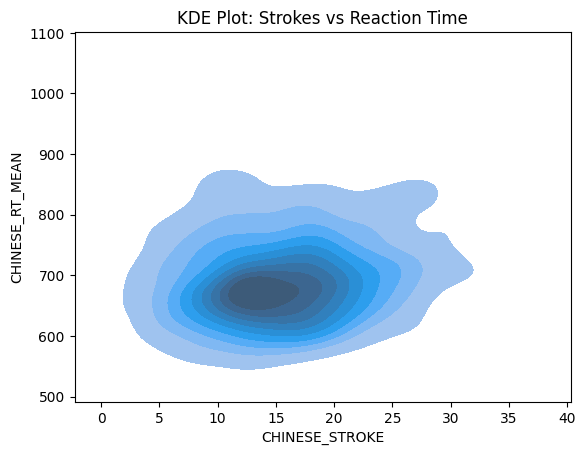

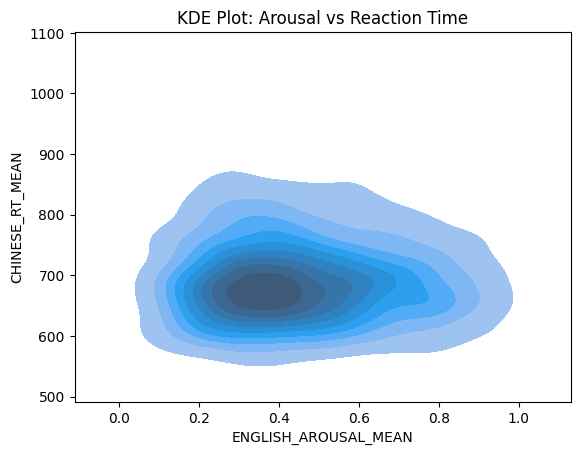

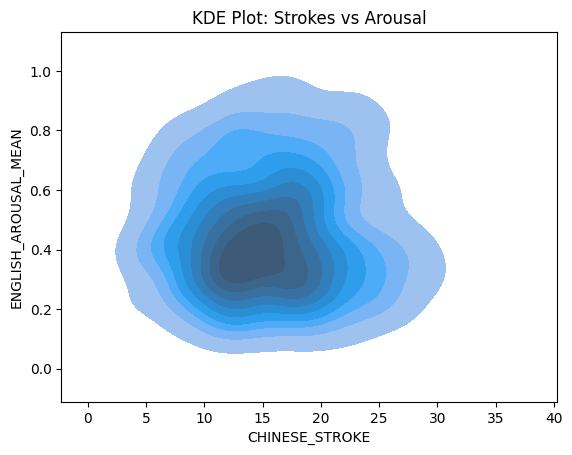

In [11]:
# Q4
import seaborn as sns
import matplotlib.pyplot as plt

# Pairwise KDE plots
sns.kdeplot(data=merged_df, x='CHINESE_STROKE', y='CHINESE_RT_MEAN', fill=True)
plt.title('KDE Plot: Strokes vs Reaction Time')
plt.show()

sns.kdeplot(data=merged_df, x='ENGLISH_AROUSAL_MEAN', y='CHINESE_RT_MEAN', fill=True)
plt.title('KDE Plot: Arousal vs Reaction Time')
plt.show()

sns.kdeplot(data=merged_df, x='CHINESE_STROKE', y='ENGLISH_AROUSAL_MEAN', fill=True)
plt.title('KDE Plot: Strokes vs Arousal')
plt.show()


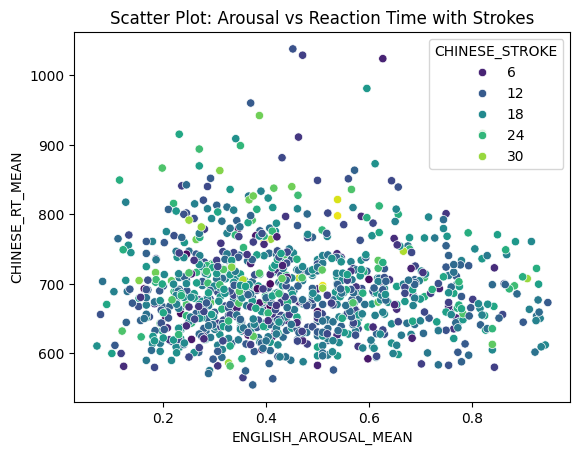

In [12]:
# Q5

# Scatter plot with hues for different numbers of strokes
sns.scatterplot(data=merged_df, x='ENGLISH_AROUSAL_MEAN', y='CHINESE_RT_MEAN', hue='CHINESE_STROKE', palette='viridis')
plt.title('Scatter Plot: Arousal vs Reaction Time with Strokes')
plt.show()

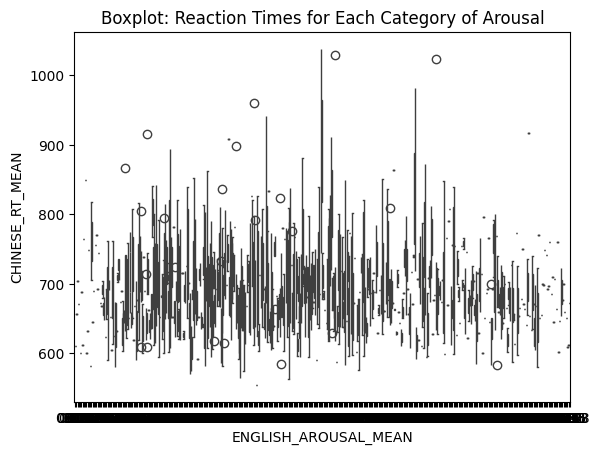

In [13]:
#Q6

# Boxplot of reaction times for each category of arousal
sns.boxplot(data=merged_df, x='ENGLISH_AROUSAL_MEAN', y='CHINESE_RT_MEAN')
plt.title('Boxplot: Reaction Times for Each Category of Arousal')
plt.show()